<a href="https://colab.research.google.com/github/Wisley1/Genes_ITMO_FALL23/blob/analysis/reading_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Transposed data prep
import requests
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#цепляем файлики
url_1 = '/content/drive/MyDrive/Colab Notebooks/ITMO FALL 23`/genes_features_normalized.pkl'
url_2 = '/content/drive/MyDrive/Colab Notebooks/ITMO FALL 23`/genes_targets_normalized.pkl'

#открываем
with open(url_1, 'rb') as file: #features
    data = pickle.load(file)

with open(url_2, 'rb') as file: #targets
    targets = pickle.load(file)

#достаем нужный таргет
targets = targets.loc[targets['ENTITY_STABLE_ID'] == 'AGRN']

#объединяем
df = pd.concat([targets, data])


#вы готовы
df = df.transpose()
df.head()

,70,266,267,268,269,270,271,272,273,274,...,55781,55782,55783,55784,55785,55786,55787,55788,55789,55790
ENTITY_STABLE_ID,AGRN,RP11-431K24.2,RNU1-7P,RP11-431K24.3,RP11-431K24.4,RN7SL729P,RNU6-991P,SLC45A1,Y_RNA,RERE,...,MT-ND3,MT-TR,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT
SKES1_BONE,3.539882,0.0,0.0,0.0,0.0,0.0,0.0,0.69802,0.0,3.470423,...,8.057696,0.254732,0.086583,0.0,0.424418,7.955328,7.77447,0.313495,7.875009,0.0
NCIH1395_LUNG,3.728295,0.0,0.0,0.014842,0.0,0.0,0.0,0.168451,0.0,1.931191,...,7.875009,0.248075,0.0,0.0,0.228576,7.77447,8.057696,0.821715,8.456017,0.0
8MGBA_CENTRAL_NERVOUS_SYSTEM,3.928495,0.018358,0.0,0.0,0.0,0.0,0.0,0.374135,0.0,2.582173,...,7.617393,0.267049,0.0,0.147359,0.183919,7.240781,6.870244,0.126934,7.690037,0.064632
GB1_CENTRAL_NERVOUS_SYSTEM,3.564631,0.0,0.0,0.0,0.0,0.0,0.0,0.80615,0.0,2.413654,...,7.311097,0.0,0.0,0.0,0.0,6.850733,6.595865,0.193022,7.690037,0.0


In [ ]:
# @title Delete missing values

# Отбор столбцов, где процент нулевых значений больше 50%
null_percentages = df.eq(0).mean()


columns_to_drop = null_percentages[null_percentages > 0.5].index


# Удаление выбранных столбцов
df = df.drop(columns=columns_to_drop)


df.head()

,70,272,274,275,279,284,285,286,288,294,...,55776,55778,55780,55781,55783,55785,55786,55787,55788,55789
ENTITY_STABLE_ID,AGRN,SLC45A1,RERE,RP5-1115A15.1,RP4-633I8.2,ENO1,ENO1-IT1,ENO1-AS1,HMGN2P17,SLC2A5,...,MT-TS1,MT-CO2,MT-TG,MT-ND3,MT-TH,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB
SKES1_BONE,3.539882,0.69802,3.470423,0.068742,0.049693,7.174483,0.259416,0.365414,0.038536,0.033019,...,2.499865,9.493607,0.501021,8.057696,0.086583,0.424418,7.955328,7.77447,0.313495,7.875009
NCIH1395_LUNG,3.728295,0.168451,1.931191,0.0,0.04572,6.716419,0.447687,0.4399,0.009316,0.136022,...,4.570667,9.493607,0.0,7.875009,0.0,0.228576,7.77447,8.057696,0.821715,8.456017
8MGBA_CENTRAL_NERVOUS_SYSTEM,3.928495,0.374135,2.582173,0.025863,0.0,6.595865,0.118574,0.171211,0.0,0.000153,...,3.175103,9.493607,0.062651,7.617393,0.0,0.183919,7.240781,6.870244,0.126934,7.690037
GB1_CENTRAL_NERVOUS_SYSTEM,3.564631,0.80615,2.413654,0.02518,0.0,8.456017,0.508394,0.433344,0.024122,0.027826,...,2.882694,9.493607,0.0,7.311097,0.0,0.0,6.850733,6.595865,0.193022,7.690037


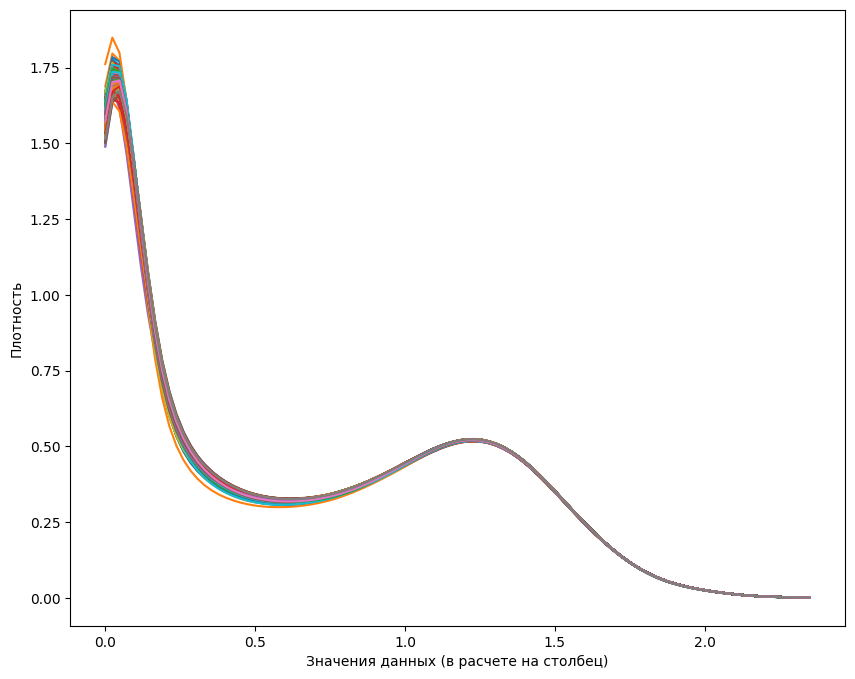

In [ ]:
def plot_col_density(data):
    # Применить гауссово сглаживание с целью получения оценки плотности
    density_per_col = [stats.gaussian_kde(col) for col in data]
    x = np.linspace(np.min(data), np.max(data), 100)

    # Установите желаемые значения ширины и высоты
    fig, ax = plt.subplots(figsize=(10, 8))

    for density in density_per_col:
        ax.plot(x, density(x))

    ax.set_xlabel('Значения данных (в расчете на столбец)')
    ax.set_ylabel('Плотность')

    plt.show()

counts = df.iloc[1:,:].values.astype(float)

# До нормализации
log_counts = np.log(counts + 1)
plot_col_density(log_counts)

In [ ]:
def most_variable_rows(data, *, n=1500):
# Вычислить дисперсию вдоль оси столбцов
  rowvar = np.var(data, axis=1)
# Получить отсортированные индексы (в порядке возрастания), взять последние n
  sort_indices = np.argsort(rowvar)[-n:]
# Использовать в качестве индекса для данных
  variable_data = data[sort_indices, :]
  return variable_data

In [ ]:
from scipy.cluster.hierarchy import linkage
def bicluster(data, linkage_method='average', distance_metric='correlation'):

  y_rows = linkage(data, method=linkage_method, metric=distance_metric)
  y_cols = linkage(data.T, method=linkage_method, metric=distance_metric)
  return y_rows, y_cols

In [ ]:
from scipy.cluster.hierarchy import dendrogram, leaves_list
def clear_spines(axes):
  for loc in ['left', 'right', 'top', 'bottom']:
    axes.spines[loc].set_visible(False)
  axes.set_xticks([])
  axes.set_yticks([])


def plot_bicluster(data, row_linkage, col_linkage, row_nclusters=10, col_nclusters=3):

  fig = plt.figure(figsize=(4.8, 4.8))

  ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])

  threshold_r = (row_linkage[-row_nclusters, 2] + row_linkage[-row_nclusters + 1, 2]) / 2
  with plt.rc_context({'lines.linewidth': 0.75}):
    dendrogram(row_linkage, orientation='left', color_threshold = threshold_r, ax = ax1)
  clear_spines(ax1)

  ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
  threshold_c = (col_linkage[-col_nclusters, 2] +
  col_linkage[-col_nclusters+1, 2]) / 2
  with plt.rc_context({'lines.linewidth': 0.75}):
    dendrogram(col_linkage, color_threshold=threshold_c, ax=ax2)
  clear_spines(ax2)

  ax = fig.add_axes([0.3, 0.1, 0.6, 0.6])

  idx_rows = leaves_list(row_linkage)
  data = data[idx_rows, :]
  idx_cols = leaves_list(col_linkage)
  data = data[:, idx_cols]
  im = ax.imshow(data, aspect='auto', origin='lower', cmap='YlGnBu_r')
  clear_spines(ax)

  ax.set_xlabel('Образцы')
  ax.set_ylabel('Гены', labelpad=125)

  axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
  plt.colorbar(im, cax=axcolor)

  plt.show()

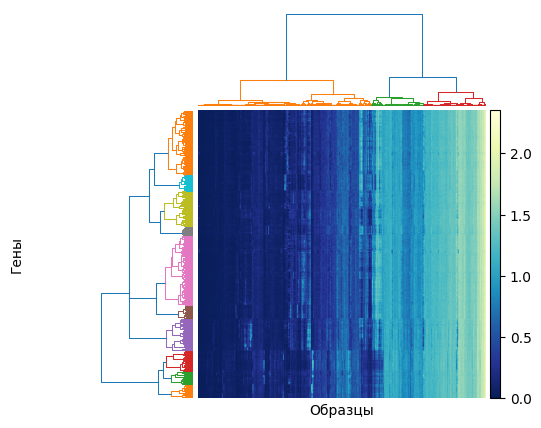

In [ ]:
counts = df.iloc[1:,:].values.astype(float)
counts_log = np.log(counts + 1)
counts_var = most_variable_rows(counts_log, n=1500)
yr, yc = bicluster(counts_var, linkage_method='ward',
distance_metric='euclidean')
plot_bicluster(counts_var, yr, yc)

In [ ]:
print(*df.T.columns.to_list(), sep='\n')

ENTITY_STABLE_ID
SKES1_BONE
NCIH1395_LUNG
8MGBA_CENTRAL_NERVOUS_SYSTEM
GB1_CENTRAL_NERVOUS_SYSTEM
U87MG_CENTRAL_NERVOUS_SYSTEM
NCIH1648_LUNG
NCIH1838_LUNG
NCIH2126_LUNG
DMS114_LUNG
DMS153_LUNG
NCIH1092_LUNG
NCIH1694_LUNG
NCIH1963_LUNG
NCIH209_LUNG
NCIH2171_LUNG
NCIH2227_LUNG
NCIH446_LUNG
NCIH526_LUNG
NCIH69_LUNG
NCIH82_LUNG
SKNDZ_AUTONOMIC_GANGLIA
CALU6_LUNG
LU65_LUNG
NCIH1355_LUNG
SHP77_LUNG
TE5_OESOPHAGUS
HCC1187_BREAST
HCC1599_BREAST
HCC2157_BREAST
HCC2218_BREAST
DMS79_LUNG
ECGI10_OESOPHAGUS
LXF289_LUNG
NCIH510_LUNG
SKMM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
TE15_OESOPHAGUS
KELLY_AUTONOMIC_GANGLIA
SIMA_AUTONOMIC_GANGLIA
TE1_OESOPHAGUS
TE10_OESOPHAGUS
TE8_OESOPHAGUS
HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
K562_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
NCIH226_LUNG
NCIH23_LUNG
SR786_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
EKVX_LUNG
HOP62_LUNG
LOXIMVI_SKIN
UACC257_SKIN
SNB75_CENTRAL_NERVOUS_SYSTEM
SF539_CENTRAL_NERVOUS_SYSTEM
SF268_CENTRAL_NERVOUS_SYSTEM
KM12_LARGE_INTESTINE
OVCAR4_OVARY
A253_SALIVA